Importing all necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import time

Function to simulate a data stream

In [2]:
def simulate_data_stream(stream_length=1000,anomaly_rate = 0.01):
    normal_data = np.random.normal(loc=0, scale=1, size=stream_length)
    anomalies = np.random.uniform(low=5, high=10, size=int(anomaly_rate * stream_length))
    # generating synthetic data stream with a mixture of normal and anomalous values, incorporating random noise
    data_stream = np.concatenate((normal_data, anomalies))
    np.random.shuffle(data_stream)
    return data_stream


Anomaly detection function using Isolation Forest

In [3]:
def detect_anomalies(data_stream, contamination=0.01):
    model = IsolationForest(contamination=contamination)

    # Reshaping for single feature
    data_stream = data_stream.reshape(-1,1)

    # Fit the Isolation Forest model to the reshaped data stream
    model.fit(data_stream)

    # Predicting anomalies using the trained model on the reshaped data stream
    anomalies = model.predict(data_stream)

    # Return the detected anomalies
    return anomalies

Visualising the Plots

In [4]:
def visualize_data_stream(data_stream, anomalies):

    # Plotting the entire data stream in blue
    plt.plot(data_stream, label='Data Stream', color='blue')

    # Highlighting the detected anomalies in red using scatter plot
    plt.scatter(np.where(anomalies == -1)[0], data_stream[anomalies == -1], color='red', label='Anomalies')

    # Setting plot title and axis labels
    plt.title('Data Stream with Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')

    # Displaying the legend indicating the blue line as data stream and red points as anomalies
    plt.legend()

    # plotting
    plt.show()


Main fuction

In [5]:
def main():
    # Setting Parameters
    stream_length = 1000
    anomaly_rate = 0.01
    contamination_rate = 0.01

    # Simulate data stream
    data_stream = simulate_data_stream(stream_length,anomaly_rate)

    # Detect anomaluies
    anomalies = detect_anomalies(data_stream, contamination_rate)

    # Visualize data stream and anomalies ( results)
    visualize_data_stream(data_stream,anomalies)

Script Execution

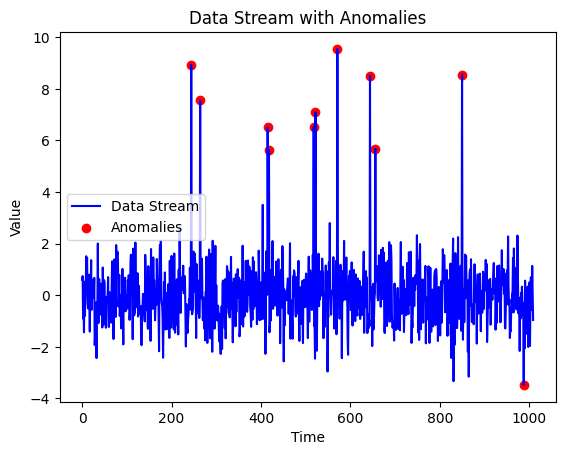

In [6]:
if __name__ == "__main__":
    main()